In [2]:
from IPython.display import Image

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
import os, sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
from lib import *


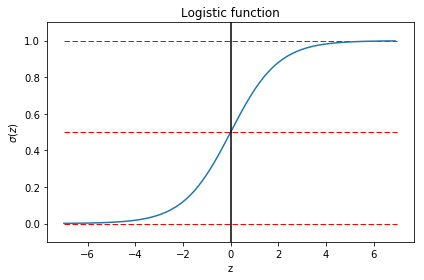

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma = logistic(z)

plt.plot(z, sigma)

plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.title('Logistic function')

plt.hlines(y=1.0, xmin=-7, xmax=7, color='red', linewidth = 1, linestyle = '--')
plt.hlines(y=0.5, xmin=-7, xmax=7, color='red', linewidth = 1, linestyle = '--')
plt.hlines(y=0, xmin=-7, xmax=7, color='red', linewidth = 1, linestyle = '--')

plt.tight_layout()
plt.savefig('./output/fig-logistic.png', dpi=300)
plt.show()


In [4]:
### import datasets, two labels, two features.

import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df.head())

# for simplicity, consider only two features and two classes

X = df[['Petal length', 'Petal width']].values[50:150,]
y, y_label = pd.factorize(df['Class label'].values[50:150])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels: %s (mapped from %s)' % (np.unique(y), np.unique(y_label)))

# Standarize X

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Training data points: 80
#Testing data points: 20
Class labels: [0 1] (mapped from ['Iris-versicolor' 'Iris-virginica'])


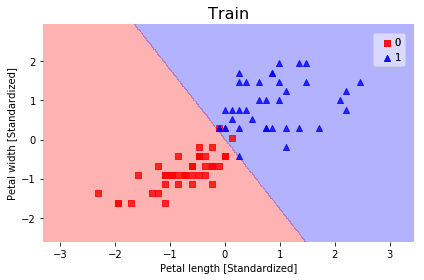

In [26]:
### Use logistic regression to train.

from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

# plot decision regions

plot_decision_regions(X_train_std, y_train, clf=lr)

plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.title('Train', fontsize = 16)

plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-boundray-train-2.png', dpi=300)
plt.show()

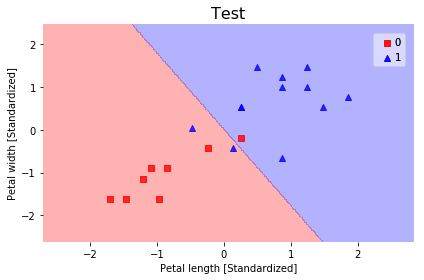

In [25]:
### Use logistic regression to test.

from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

# plot decision regions

plot_decision_regions(X_test_std, y_test, clf=lr)

plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.title('Test', fontsize = 16)

plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-boundray-test-2.png', dpi=300)
plt.show()

In [30]:
prob1 = lr.predict_proba(X_test_std[1, :].reshape(1, -1))
prob0 = lr.predict_proba(X_test_std[0, :].reshape(1, -1))

print('Prob for class %s: %.2f' % (y_label[0], prob1[:, 0]))
print('Prob for class %s: %.2f' % (y_label[1], prob1[:, 1]))
print('Prob for class %s: %.2f' % (y_label[0], prob0[:, 0]))
print('Prob for class %s: %.2f' % (y_label[1], prob0[:, 1]))


Prob for class Iris-versicolor: 0.01
Prob for class Iris-virginica: 0.99
Prob for class Iris-versicolor: 0.00
Prob for class Iris-virginica: 1.00


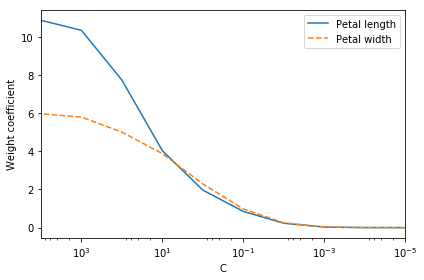

In [31]:
### Regularization

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    # get the coefficients of w
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1],
         label='Petal width', linestyle='--')
plt.xlim(10**4, 10**-5)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Weight coefficient')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-c.png', dpi=300)
plt.show()


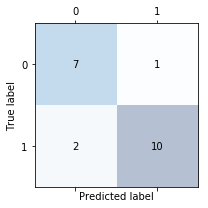

In [32]:
### Evaluation Metrics for Binary Classifiers

from sklearn.metrics import confusion_matrix

lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-confusion-2.png', dpi=300)
plt.show()


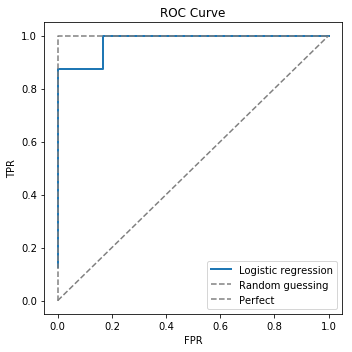

In [34]:
### Receiver Operating Characteristic (ROC) Curve

from sklearn.metrics import roc_curve
from scipy import interp
from cycler import cycler

lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)

fig = plt.figure(figsize=(5, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

probas = lr.predict_proba(X_test_std)

fpr, tpr, thresholds = roc_curve(y_test, probas[:, 0], pos_label=0)

plt.plot(fpr, tpr, lw=2, label='Logistic regression')
    
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')

plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', color='gray',label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('./output/fig-roc-lg.png', dpi=300)
plt.show()


In [35]:
### area below

from sklearn.metrics import auc

print('AUC: %.2f' % auc(fpr, tpr))

AUC: 0.98


#Training data points: 16 + 33 + 31 = 80
#Testing data points: 4 + 17 + 19 = 40
Class labels: [0 1 2] (mapped from ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'])


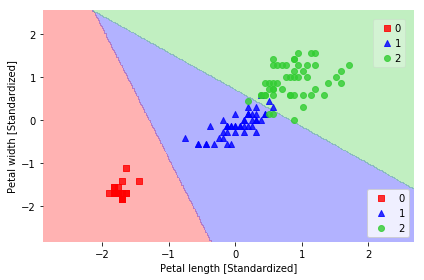

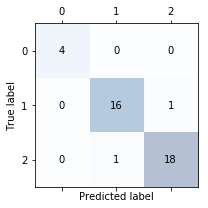

[Precision]
Individual: 1.00, 0.94, 0.95
Micro: 0.95
Macro: 0.96

[Recall]
Individual: 1.00, 0.94, 0.95
Micro: 0.95
Macro: 0.96

[F1-score]
Individual: 1.00, 0.94, 0.95
Micro: 0.95
Macro: 0.96


In [39]:
### multivariate class

from sklearn.metrics import precision_score, recall_score, f1_score
from lib import *

# prepare datasets

X = df[['Petal length', 'Petal width']].values[30:150,]
y, y_label = pd.factorize(df['Class label'].values[30:150])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)

print('#Training data points: %d + %d + %d = %d' % ((y_train == 0).sum(), 
                                                    (y_train == 1).sum(), 
                                                    (y_train == 2).sum(), 
                                                     y_train.size))
print('#Testing data points: %d + %d + %d = %d' % ((y_test == 0).sum(), 
                                                    (y_test == 1).sum(), 
                                                    (y_test == 2).sum(), 
                                                     y_test.size))
print('Class labels: %s (mapped from %s)' % (np.unique(y), np.unique(y_label)))

# standarize X

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# training & testing

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

# plot decision regions

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,
                      clf=lr)

plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-boundray-3.png', dpi=300)
plt.show()

# plot confusion matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-confusion-3.png', dpi=300)
plt.show()

# metrics

print('[Precision]')
p = precision_score(y_true=y_test, y_pred=y_pred, average=None)
print('Individual: %.2f, %.2f, %.2f' % (p[0], p[1], p[2]))
p = precision_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % p)
p = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % p)

print('\n[Recall]')
r = recall_score(y_true=y_test, y_pred=y_pred,average=None)
print('Individual: %.2f, %.2f, %.2f' % (r[0], r[1], r[2]))
r = recall_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % r)
r = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % r)

print('\n[F1-score]')
f = f1_score(y_true=y_test, y_pred=y_pred, average=None)
print('Individual: %.2f, %.2f, %.2f' % (f[0], f[1], f[2]))
f = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % f)
f = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % f)
